<a href="https://colab.research.google.com/github/ixd-ai-hub/Research-Ground/blob/feature%2FCU-865d7mpad-sticker-generation-models/models/VOID_Diffusion_(NSFW_Stable_Diffusion_v2_1)_v0_6_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="#943fd9">VOID Diffusion (NSFW Stable Diffusion v2.1)</font>&nbsp;<small>**v0.6.11**</small>

---
Latest version: https://colab.research.google.com/drive/1MRwvDBNc4jhlEXSAtdLe49A4C1k35pgp

Discord: https://discord.gg/yYEaTwuWFZ

Contact: `Beyondo#0130` or beyondo@voidops.com

Website: [voidops.com](https://)

❤️ Please star the repository here: https://github.com/Beyondo/void-diffusion

<img>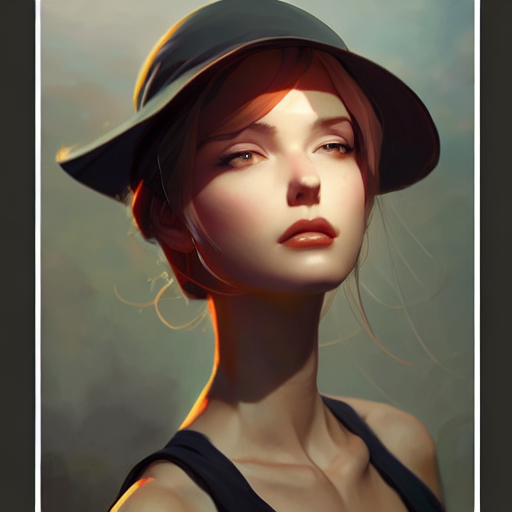</img>

*I could understand NSFW-filtering in the output, but why in the training datasets?*

# <font color="white">Setup</font>

In [ ]:
from IPython import get_ipython
# @title <font color="cyan">Model Selector</font>
DevMode = False
Version = "v0.6.11"
Model = "hakurei/waifu-diffusion" # @param ["runwayml/stable-diffusion-v1-5", "stabilityai/stable-diffusion-2-1", "CompVis/stable-diffusion-v1-4", "naclbit/trinart_stable_diffusion_v2", "hakurei/waifu-diffusion"]
#@markdown **Available models**:<br>
#@markdown `Quality` ~ `NSFW` -> `Model Name`<br>
#@markdown - <font color="gold">`2nd`</font> ~ <font color="orange">`1st`</font> -> `runwayml/stable-diffusion-v1-5` (<font color="orange">General</font>)<br>
#@markdown - <font color="orange">`1st`</font> ~ <font color="red">`BAD`</font> -> `stabilityai/stable-diffusion-2-1` (<font color="orange">General</font>)<br>
#@markdown - <font color="yellow">`3rd`</font> ~ <font color="gold">`2nd`</font> -> `CompVis/stable-diffusion-v1-4` (<font color="orange">General</font>)<br>
#@markdown ***
#@markdown - <font color="orange">`1st`</font> ~ <font color="orange">`1st`</font> -> `naclbit/trinart_stable_diffusion_v2` (<font color="#A169FF">Artistic</font>)<br>
#@markdown ***
#@markdown - <font color="orange">`1st`</font> ~ <font color="orange">`1st`</font> -> `hakurei/waifu-diffusion` (<font color="#C569FF">Anime</font>)<br>
import importlib, os, shutil
try:
    importlib.reload(colab)
    importlib.reload(text2img)
except: pass
# Clone repo
if os.path.exists("/content/"):
    # In colab
    if os.path.exists("/content/void-diffusion"):
        shutil.rmtree('/content/void-diffusion')
    os.chdir("/content")
    if DevMode:
      print("Cloning an unstable version -> ", end="")
      get_ipython().system("git clone https://github.com/Beyondo/void-diffusion.git &> /dev/null")
    else:
      print("Updating from Beyondo/void-diffusion (%s) -> " % Version, end="")
      get_ipython().system("git clone --depth 1 --branch %s https://github.com/Beyondo/void-diffusion.git &> /dev/null" % Version)
    print("Done.")
    try: os.chdir("/content/void-diffusion")
    except: print("Couldn't clone the repository. You sure that version exists?")
    print("Installing dependencies -> ", end="")
    !pip install einops torch transformers diffusers accelerate > /dev/null
    print("Done.")
    import colab
    importlib.reload(colab)
    try: colab.init(Model)
    except Exception as e:
      print("Error: ")
      print(e)
      print("\nThings you can try:\n- Just click again\n- Delete and restart the runtime\n- Select a different model")
else:
    # Not in colab
    if not os.path.basename(os.getcwd()) == "void-diffusion":
      if DevMode:
        print("Cloning an unstable version -> ", end="")
        !git clone https://github.com/Beyondo/void-diffusion.git &> /dev/null
      else:
        print("Updating from Beyondo/void-diffusion (%s) -> " % Version, end="")
        !git clone --depth 1 --branch v0.6 https://github.com/Beyondo/void-diffusion.git &> /dev/null
      print("Done.")
      os.chdir("void-diffusion")
    !git pull >nul
    print("Installing dependencies -> ", end="")
    !pip install einops torch transformers diffusers accelerate >nul
    print("Done.")
    import colab
    try: colab.init(Model)
    except Exception as e:
      print("Error: ")
      print(e)
      print("\nThings you can try:\n- Just click again\n- Delete and restart the runtime\n- Select a different model")

In [ ]:
try:
  import colab, os, shutil, datetime
  from IPython import display
  from IPython.display import HTML
  if colab.ready: # needed to trigger an exception
    #@title <font color="orange">Settings & Google Drive</font>
    #@markdown General
    Seed = 100 #@param {type:"number"}
    if Seed == None:
        Seed = 0
    Width = "512" #@param [128, 256, 384, 448, 512, 576, 640, 704, 768, 832, 896, 960, 1024]
    Height = "512" #@param [128, 256, 384, 448, 512, 576, 640, 704, 768, 832, 896, 960, 1024]
    #@markdown <small>Schedulers currently are not implemented.
    Scheduler = "Default" #@param ["Default", "K-EULER", "DDIM", "K-LMS", "DPMSolver-Multistep"]
    #@markdown Google Drive settings
    SaveToGoogleDrive = True #@param {type:"boolean"}
    SaveDiffusionSettings = True #@param {type:"boolean"}
    Directory = "AI-Gen" #@param {type:"string"}
    colab.settings['Seed'] = int(Seed)
    colab.settings['Width'] = int(Width)
    colab.settings['Height'] = int(Height)
    colab.settings['Scheduler'] = Scheduler
    colab.save_directory = Directory
    colab.save_settings = SaveDiffusionSettings
    ShouldSaveToGoogleDrive = False
    try:
      # GDrive
      if SaveToGoogleDrive:
        from google.colab import drive
        drive.mount('/content/gdrive', force_remount=True)
        ShouldSaveToGoogleDrive = True
      # Log
      display.display(HTML("<strong><span style='color: green'>Last saved at %s</span></strong>" % datetime.datetime.now().strftime("%H:%M")))
    except Exception as e: print(e)
except: print("Couldn't save settings! No model was selected.")

Mounted at /content/gdrive


# <font color="#F03000">Text To Image</font>

'Iterations: 4/4'

'Seed: 100'

'Execution time: 20.07s'

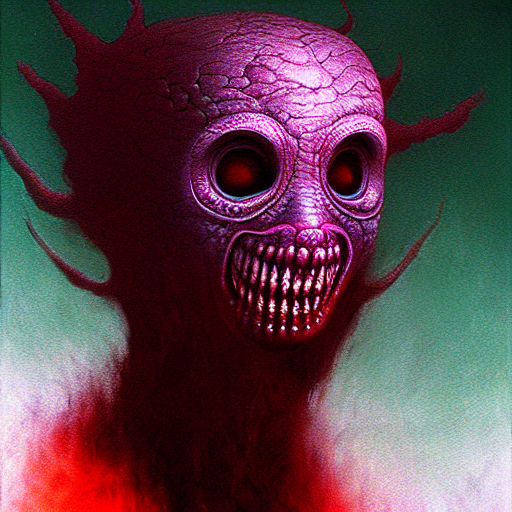

  0%|          | 0/100 [00:00<?, ?it/s]

Saved to AI-Gen/1671036798_0.png


'Seed: 101'

'Execution time: 20.12s'

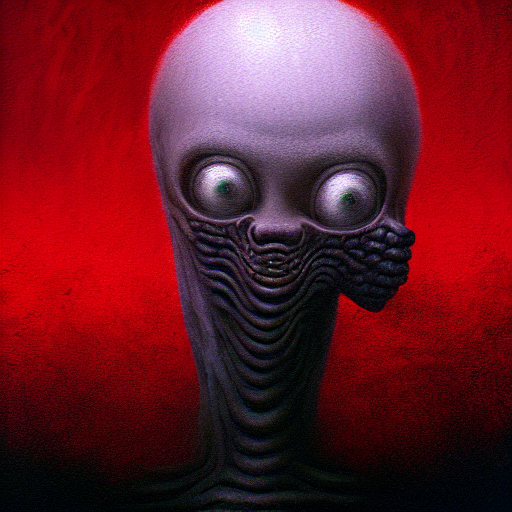

  0%|          | 0/100 [00:00<?, ?it/s]

Saved to AI-Gen/1671036798_1.png


'Seed: 102'

'Execution time: 20.45s'

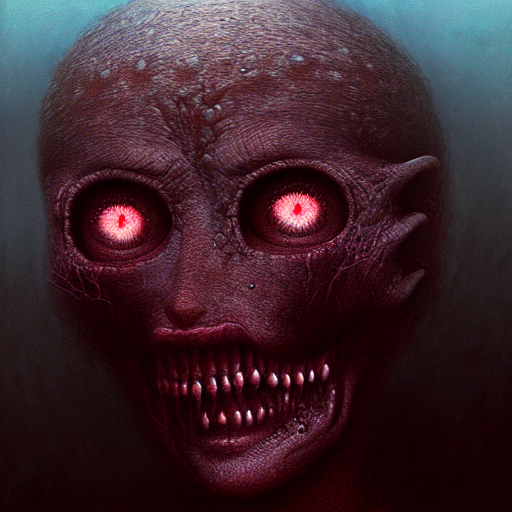

  0%|          | 0/100 [00:00<?, ?it/s]

Saved to AI-Gen/1671036798_2.png


'Seed: 103'

'Execution time: 20.43s'

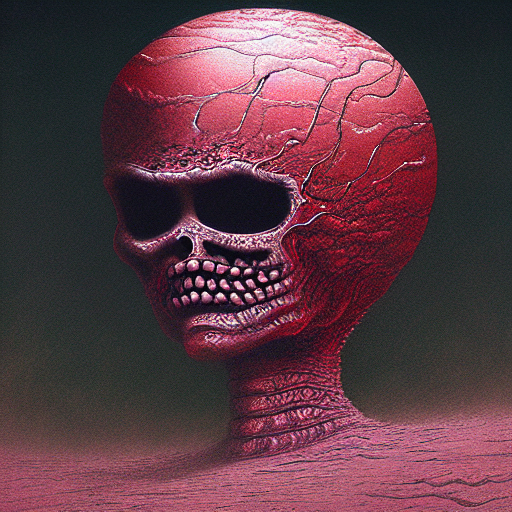

  0%|          | 0/100 [00:00<?, ?it/s]

Saved to AI-Gen/1671036798_3.png


In [ ]:
try:
  import colab, text2img, importlib
  if colab.ready:
    importlib.reload(text2img)
    #@markdown <b>Prompt</b> is what you want to see, while <b>NegativePrompt</b> is the opposite.
    Prompt = "creepy warrior girl hyper-realistic  digital painting by Zdzis\u0142aw Beksi\u0144ski" #@param {type:"string"}
    NegativePrompt = "" #@param {type:"string"}
    GuidanceScale = 13.8 #@param {type:"slider", min:1, max:30, step:0.1}
    Steps = 100 #@param {type:"slider", min:1, max:500, step:1}
    Iterations = 4 #@param {type:"slider", min:1, max:50, step:1}
    Preview = False #@param {type:"boolean"}
    colab.settings["Prompt"] = Prompt
    colab.settings["NegativePrompt"] = NegativePrompt
    colab.settings['GuidanceScale'] = float(GuidanceScale)
    colab.settings["Steps"] = Steps
    colab.settings["Iterations"] = Iterations
    try:
      text2img.process(ShouldSave=ShouldSaveToGoogleDrive, ShouldPreview=Preview)
    except Exception as e: print(e)
except: print("No model was selected.")
#@markdown <small>**Iterations**: Number of images you want to generate per prompt.</small><br>
#@markdown ***
#@markdown <i><small>**Misconception**: The frames in progress preview **are not the same** as the images generated from lower inference steps.</small></i>

# <font color="#F03000">Image To Image</font>

In [ ]:
try:
  import colab, img2img, importlib
  if colab.ready:
    importlib.reload(img2img)

    #@markdown <b>Prompt</b> is what you want to see, while <b>NegativePrompt</b> is the opposite.
    InitialImageURL = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg" #@param {type:"string"}
    Prompt = "A fantasy landscape with a blue river between a desert on the left and grass on the right at night, trending on artstation" #@param {type:"string"}
    NegativePrompt = "boring, simple, morning" #@param {type:"string"}
    Strength = 0.75 #@param {type:"slider", min:0, max:1, step:0.01}
    GuidanceScale = 13.8 #@param {type:"slider", min:1, max:30, step:0.1}
    Steps = 200 #@param {type:"slider", min:1, max:500, step:1}
    Iterations = 4 #@param {type:"slider", min:1, max:50, step:1}
    Preview = True #@param {type:"boolean"}
    colab.settings["Prompt"] = Prompt
    colab.settings["NegativePrompt"] = NegativePrompt
    colab.settings['GuidanceScale'] = float(GuidanceScale)
    colab.settings["Strength"] = Strength
    colab.settings["InitialImageURL"] = InitialImageURL
    colab.settings["Steps"] = Steps
    colab.settings["Iterations"] = Iterations
    #@markdown <small>**Prompt** - Describe your image.<br>

    #@markdown <small>**Strength** - The strength of your positive and negative prompts against your image.<br>
    #@markdown - 1 means the model doesn't care about the information in your image.
    #@markdown - 0 means the model doesn't care about your prompts.
    #@markdown - In img2img, you almost always want something in between.
    #@markdown - **Special case:** Set to 1 or 0 if your prompt completely contradicts your image or vice versa.
    #@markdown - **Note:** Setting strength to 1 or 0 is very common in inpainting for drawing exotic/unnatural art.</small>

    #@markdown <small>**InitialImageURL** - A **direct** URL of your initial image.<br>
    #@markdown - You could upload in Discord in private DMs, and then open it in browser and copy the URL here.
    #@markdown - Or use any free-uploading service.</small>
    try:
      img2img.process(ShouldSave=ShouldSaveToGoogleDrive, ShouldPreview=Preview)
    except Exception as e: print(e)
except: print("No model was selected.")